# 기초세팅

In [1]:
%cd drive/MyDrive/Colab\ Notebooks/IndustrialClassification

/content/drive/MyDrive/Colab Notebooks/IndustrialClassification


## 한글 세팅

In [ ]:
!sudo apt-get update -qq
!sudo apt-get install fonts-nanum* -qq

In [ ]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

NanumBarunGothic


In [ ]:
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
import seaborn as sns

In [ ]:
sns.set(font=font_name, 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [ ]:
import pandas as pd

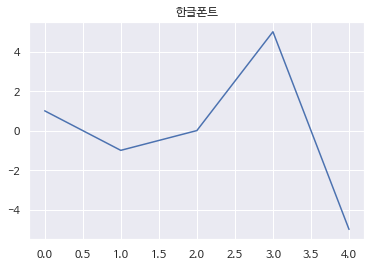

In [ ]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")
None

## Import

In [2]:
from typing import *
import pandas as pd
import seaborn as sns
import numpy as np

# Data load

In [49]:
df = pd.read_csv('data/dataset.csv', index_col='AI_id')

In [50]:
df

,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
AI_id,,,,,,
id_0000001,S,95,952,카센터에서,자동차부분정비,타이어오일교환
id_0000002,G,47,472,상점내에서,일반인을 대상으로,채소.과일판매
id_0000003,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매
id_0000004,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치
id_0000005,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육
...,...,...,...,...,...,...
id_0999996,C,13,134,제품입고,워싱,청바지워싱
id_0999997,F,42,424,현장에서,고객의요청에의해,실내인테리어
id_0999998,G,47,474,영업점에서,일반소비자에게,여성의류 판매


# External tokenizer

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 59.1 MB/s 
     |████████████████████████████████| 6.5 MB 32.9 MB/s 
     |████████████████████████████████| 596 kB 55.0 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## SKT

In [ ]:
from transformers import PreTrainedTokenizerFast

In [ ]:
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>')

Downloading:   0%|          | 0.00/2.69M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [ ]:
tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o")

['▁안녕',
 '하',
 '세',
 '요.',
 '▁한국어',
 '▁G',
 'P',
 'T',
 '-2',
 '▁입',
 '니다.',
 '😤',
 ':)',
 'l^o']

In [ ]:
type(df.text_obj[0])

str

In [ ]:
tokenizer.tokenize(df.text_obj[2])

['▁절단', '하여', '사업', '체', '에도', '매']

In [ ]:
tokenizer.tokenize('절단하여 사업체에 도매')

['▁절단', '하여', '▁사업', '체에', '▁도매']

In [ ]:
def report_error(s: str) -> None:
  try:
    tokenizer.tokenize(s)
  except:
    print(s)

In [ ]:
def tokenize(s: str)-> List[str]:
  try:
    return tokenizer.tokenize(s)
  except:
    return []

In [ ]:
df['text_obj_skt'] = df.text_obj.apply(tokenize)

In [ ]:
df['text_mthd_skt'] = df.text_mthd.apply(tokenize)
df['text_deal_skt'] = df.text_deal.apply(tokenize)

In [ ]:
df

,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,text_obj_skt,text_mthd_skt,text_deal_skt
AI_id,,,,,,,,,
id_0000001,S,95,952,카센터에서,자동차부분정비,타이어오일교환,"[▁카, 센터, 에서]","[▁자동차, 부분, 정비]","[▁타이어, 오, 일, 교환]"
id_0000002,G,47,472,상점내에서,일반인을 대상으로,채소.과일판매,"[▁상점, 내에서]","[▁일반, 인을, ▁대상으로]","[▁채소, ., 과일, 판매]"
id_0000003,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매,"[▁절단, 하여, 사업, 체, 에도, 매]","[▁공업, 용, 고, 무를, 가, 지고]","[▁합성, 고, 무도, 매]"
id_0000004,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치,"[▁영업, 점에서]","[▁일반, 소비, 자에게]","[▁열쇠, 잠, 금, 장치]"
id_0000005,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육,"[▁어린이, 집]","[▁보호, 자의, ▁위탁, 을, ▁받아]","[▁취학, 전, 아동, 보육]"
...,...,...,...,...,...,...,...,...,...
id_0999996,C,13,134,제품입고,워싱,청바지워싱,"[▁제품, 입, 고]","[▁워, 싱]","[▁청, 바지, 워, 싱]"
id_0999997,F,42,424,현장에서,고객의요청에의해,실내인테리어,[▁현장에서],"[▁고객의, 요, 청에, 의, 해]","[▁실내, 인, 테, 리어]"
id_0999998,G,47,474,영업점에서,일반소비자에게,여성의류 판매,"[▁영업, 점에서]","[▁일반, 소비, 자에게]","[▁여성의, 류, ▁판매]"


In [ ]:
df.text_obj_skt.apply(len).value_counts()

2     508860
3     217174
4      86034
1      75268
5      53790
0      16677
6      15580
7       9092
8       5807
9       4035
10      2567
11      1703
12      1121
13       853
14       507
15       374
16       191
17       131
18        92
19        58
20        38
21        14
22        14
24         5
25         4
26         3
23         3
27         2
29         1
33         1
28         1
Name: text_obj_skt, dtype: int64

In [ ]:
df.text_mthd_skt.apply(len).value_counts()

3     285968
4     228448
2     194117
5      86119
6      76793
0      43619
1      39528
7      19246
8      11515
9       7307
10      2892
11      1766
12      1053
13       614
14       352
15       215
16       156
17       102
18        65
19        34
20        30
21        17
23        16
22        13
24         4
25         3
26         3
30         2
27         1
34         1
28         1
Name: text_mthd_skt, dtype: int64

# Tokenizer

In [47]:
class DealTokenizer:
  def __init__(self, pre_tokens='data/pre_toks_220321_4.csv'):
    
    self.changer = {'a/s':' 수리 '}
    self.separators = ['/', 'ㆍ',':', ';', '?', '？', '&', ',', '，', '.', '．', '(', ')', '및']
    self.pre_tokens = list(pd.read_csv(pre_tokens)['0'])
    self.pre_tokens.sort(key=len, reverse=True)

  def change(self, s: str) -> str:
    for asis, tobe in self.changer.items():
      s = s.replace(asis, tobe)
    return s

  def separate(self, s: str) -> str:
    for seq in self.separators:
      s = s.replace(seq, ' ')
    return s
  
  def extract_pre_tokens(self, s: str) -> str:
    for token in self.pre_tokens:
      s = s.replace(token, f' {token} ')
    return s

  def replace(self, s: str) -> str:
    return self.extract_pre_tokens(self.separate(self.change(s)))

  def tokenize(self, s: str) -> List[str]:
    return self.replace(s).split() if s is not np.nan else []


## Default

In [ ]:
tokenizer = DealTokenizer()

In [ ]:
toks = df.text_deal.apply(tokenizer.tokenize)

In [ ]:
toks

AI_id
id_0000001      [타이어, 오일, 교환]
id_0000002       [채소, 과일, 판매]
id_0000003     [합성, 고, 무도, 매]
id_0000004     [열, 쇠, 잠금, 장치]
id_0000005      [취학전, 아동, 보육]
                   ...       
id_0999996        [청, 바지, 워싱]
id_0999997         [실내, 인테리어]
id_0999998     [여성, 의, 류, 판매]
id_0999999             [필라테스]
id_1000000    [한식, 미역, 구, 판매]
Name: text_deal, Length: 1000000, dtype: object

In [ ]:
toks.to_csv('data/toks_test.csv')

In [ ]:
mthd_toks = df.text_mthd.apply(tokenizer.tokenize)

In [ ]:
mthd_toks.to_csv('data/mthd_toks_test.csv')

In [ ]:
toks = toks.explode().value_counts()

In [ ]:
toks[toks > 100]

서비스     174101
판매      103486
운송       88627
제공       49587
화물       47635
         ...  
로또복권       101
냉동기        101
발레         101
내부         101
장치         101
Name: text_deal, Length: 1610, dtype: int64

In [ ]:
toks.to_csv('data/toks_v1.csv')

## Add pre_toks

In [ ]:
pre_toks = list(toks[toks > 100].index)

In [ ]:
tokenizer.pre_tokens += pre_toks

In [ ]:
new_toks = df.text_deal.apply(tokenizer.tokenize).explode().value_counts()

In [ ]:
new_toks

서비스       174101
판매        103486
운송         88627
기          86702
물          81425
           ...  
규결화한           1
노동자이익향         1
봉투만듬           1
대생             1
양채류-양          1
Name: text_deal, Length: 30583, dtype: int64

In [ ]:
new_toks.to_csv('data/toks_v2.csv')

## Refine pre_toks

In [ ]:
pre_toks = pd.read_csv('data/toks_v3.csv')

In [ ]:
pre_toks = list(pre_toks.token)

In [ ]:
tokenizer = DealTokenizer()

In [ ]:
tokenizer.pre_tokens += pre_toks

In [ ]:
new_toks = df.text_deal.apply(tokenizer.tokenize).explode().value_counts()

In [ ]:
new_toks

서비스         174101
판매          103486
운송           88627
제공           49587
화물           49197
             ...  
모니터사용설명서         1
돼고고기             1
푸전               1
SPINDLE          1
용매트리스            1
Name: text_deal, Length: 43696, dtype: int64

In [ ]:
new_toks.to_csv('data/tokes_v4.csv')

## Use industial class

In [ ]:
df_class = pd.read_csv('data/ind_class.csv')

In [ ]:
df_class

,col1,col2,col3,col4
0,농업,작물 재배업,곡물 및 기타 식량작물 재배업,곡물 및 기타 식량작물 재배업
1,NaN,NaN,"채소, 화훼작물 및 종묘 재배업",채소작물 재배업
2,NaN,NaN,NaN,화훼작물 재배업
3,NaN,NaN,NaN,종자 및 묘목 생산업
4,NaN,NaN,"과실, 음료용 및 향신용 작물 재배업",과실작물 재배업
...,...,...,...,...
1192,가구 내 고용활동,가구 내 고용활동,가구 내 고용활동,가구 내 고용활동
1193,달리 분류되지 않은 자가 소비를 위한 가구의 재화 및 서비스 생산활동,자가 소비를 위한 가사 생산 활동,자가 소비를 위한 가사 생산 활동,자가 소비를 위한 가사 생산 활동
1194,NaN,자가 소비를 위한 가사 서비스 활동,자가 소비를 위한 가사 서비스 활동,자가 소비를 위한 가사 서비스 활동
1195,국제 및 외국기관,국제 및 외국기관,국제 및 외국기관,주한 외국 공관


In [ ]:
cs = list(df_class.col1.dropna()) + list(df_class.col2.dropna()) + list(df_class.col3.dropna()) + list(df_class.col4.dropna())

In [ ]:
df_class = pd.DataFrame(cs)

In [ ]:
df_class

,0
0,농업
1,임업
2,어업
3,"석탄, 원유 및 천연가스 광업"
4,금속 광업
...,...
1995,가구 내 고용활동
1996,자가 소비를 위한 가사 생산 활동
1997,자가 소비를 위한 가사 서비스 활동
1998,주한 외국 공관


In [ ]:
tokenizer = DealTokenizer()

In [ ]:
toks = df_class[0].apply(tokenizer.tokenize).explode().value_counts()

In [ ]:
toks

업       1221
제조       688
기타       359
제품       189
서비스      159
        ... 
너트류        1
나사         1
캔          1
포장용기       1
공관         1
Name: 0, Length: 1551, dtype: int64

In [ ]:
toks.to_csv('data/ind_class_toks.csv')

### Ver 2

In [ ]:
toks.Column1

,Column1
0,제조
1,기타
2,제품
3,서비스
4,도매
...,...
1687,너트
1688,나사
1689,캔
1690,포장


In [ ]:
ind_class_toks = pd.read_csv('data/ind_class_toks.csv')

In [ ]:
'합성고무' in ind_class_toks['Unnamed: 0']

False

In [ ]:
compounds = []

In [ ]:
prefixes = ['비']
subfixes = ['업', '류', '식', '품', '용', '물', '제', '학', '장', '방', '관', '화', '과', '기', '소', '점', '원', '터', '별', '교', '사']

for t in ind_class_toks['Unnamed: 0']:
  if len(t) < 2:
    continue
  
  if sum(map(t.startswith, prefixes)) + sum(map(t.endswith, subfixes)) > 0:
    compounds.append(t)



In [ ]:
for t in ind_class_toks['Unnamed: 0']:
  if t.startswith('재'):
    print(t)

재배업
재생업
재산권
재생
재료
재
재보험업
재처리업
재생용
재화
재활원
재정
재해


In [ ]:
#len(compounds)

586

In [ ]:
len(compounds)

1311

In [ ]:
toks_v2 = list(pd.read_csv('data/ind_class_toks_v2.csv').Column1)

In [ ]:
toks_v2 += compounds

In [ ]:
len(toks_v2)

2345

In [ ]:
toks_v2 = list(set(toks_v2))

In [ ]:
len(toks_v2)

1617

In [ ]:
pre_toks = list(pd.read_csv('data/toks_v3.csv').token)

In [ ]:
pre_toks = list(set(pre_toks))

In [ ]:
len(pre_toks)

875

In [ ]:
pre_toks += toks_v2

In [ ]:
pre_toks = list(set(pre_toks))

In [ ]:
pre_toks += tokenizer.pre_tokens

In [ ]:
pre_toks = list(set(pre_toks))

In [ ]:
len(pre_toks)

2120

In [ ]:
pd.DataFrame(pre_toks).to_csv('data/pre_toks_220321_2.csv', index=False)

In [ ]:
pt = pd.read_csv('data/pre_toks_220321_2.csv')

In [ ]:
for t in tokenizer.pre_tokens:
  if len(t) == 1:
    print(t)

회
류
열
을
탭
쌀
캔
꽃
솜
펌
닭
차
찜
초
밥
술
벽
컷
죽
콩
약
못
댐
등
옷
를
티
떡
석
톱
책
침
즙
빵


In [ ]:
pt[pt['0'].apply(len) > 1].to_csv('data/pre_toks_220321_3.csv', index=False)

In [ ]:
pt_over_1 = list(pt[pt['0'].apply(len) > 1]['0'])

In [ ]:
len(pt_over_1)

2086

In [ ]:
'내장' in pt_over_1

False

In [ ]:
pt_over_1.remove('내장')

In [ ]:
pt_over_1 += ['일본', '양성', '혈압', '패널']

In [ ]:
pt = pt_over_1 + ['을', '를', '등', '댐', '떡', '옷', '컷', '꽃', '류', '밥', '못', '즙', '빵']

In [ ]:
pd.DataFrame(pt).to_csv('data/pre_toks_220321_4.csv', index=False)

## Mthd

In [13]:
pt = list(pd.read_csv('data/pre_toks_220321_4.csv')['0'])

In [36]:
'업자' in pt

False

In [37]:
new_pt = ['2차', '3차', '매장', '들','업자','이용자', '중학생', '초등학생', '고등학생', '대학생', '대학원생', '직장인', '직장', '사용자', '사용', '보호자', '일반인들', '보호자들', '체결', '체인', '금은','에의해', '위탁', '받아', '받는', '의해','접객', '고객', '으로', '로', '으로서', '로서','으로써', '로써', '에게', '대상', '학생들', '학생', '현장', '에서', '께서', '한테', '한테서', '더러', '에게서', '처럼', '같이', '만큼', '만치', '하고', '이며', '에다', '에다가', '부터', '로부터', '으로부터', '까지', '마저', '조차', '일랑', '커녕', '뿐', '뿐만', '아니라', '따라', '토록', '밖에', '대로', '데로', '든가', '든지', '이며', '보다', '처럼', '만큼', '같이', '조차', '마저', '까지', '이나', '이나마', '나마', '이라도', '라도', '하여']

In [38]:
new_pt = list(set(new_pt))

In [39]:
len(new_pt)

78

In [40]:
pt += new_pt

In [41]:
len(pt)

2224

In [42]:
pt = list(set(pt))

In [43]:
len(pt)

2180

In [44]:
pt.sort(key=len, reverse=True)

In [46]:
pd.DataFrame(pt).to_csv('data/pre_toks_220322_1.csv', index=False)

In [48]:
tokenizer = DealTokenizer(pre_tokens='data/pre_toks_220322_1.csv')

In [51]:
mthd_toks = df.text_mthd.apply(tokenizer.tokenize)

In [52]:
mthd_toks.to_csv('data/mthd_toks_test_220322.csv')

In [53]:
mthd_toks_cnt = mthd_toks.explode().value_counts()

In [55]:
mthd_toks_cnt.to_csv('data/mthd_toks_cnt_220322.csv')

In [94]:
mthd_toks_cnt

을         291219
로         273038
으         245805
대상        230920
일반        227086
           ...  
광주e7t          1
Tworld         1
멸종위기동          1
글렌딩            1
예채             1
Name: text_mthd, Length: 29103, dtype: int64

In [113]:
'카페' in pt

False

In [114]:
new_pt = ['카페','입찰','하도급','위기','기업','외래','행위','영업','무도시설', '도시민', '농민', '없이', '의뢰', '의뢰인', '계통', '사찰', '세액', '계산','요청', '인해', '중고생', '관할', '지역', '구청', '교육청', '인가', '간에', '중탕', '받음', '통해', '통해서', '다른', '위기', '수거', '몰딩', '에폭시', '관해서', '관하여', '해서', '하여서', '부착', '레스토랑', '초음파', '매입', '카메라', '사출', '조임', '프레임', '아래', '없는', '자판기', '미만', '가게', '국악', '갖추고', '업체', '화원', '방지', '교회','향상','수수료', '시설', '하면', '하면서', '벽면', '요구', '고객', '수퍼', '의거', '의해서', '의한', '의하면']

In [115]:
new_pt = list(set(new_pt))

In [88]:
risky_pt = ['에']

In [89]:
to_del_pt = ['도시']

In [83]:
pt.remove('도시')

In [109]:
pt += new_pt

In [90]:
pt += risky_pt

In [116]:
pt = list(set(pt))

In [117]:
pt.sort(key=len, reverse=True)

In [118]:
pd.DataFrame(pt).to_csv('data/pre_toks_220322_2.csv', index=False)

## Obj